In [1]:
# Import modules

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.0'

In [3]:
# Import the data
data = tf.keras.datasets.boston_housing.load_data()

In [4]:
data[0][0].shape, data[0][1].shape

((404, 13), (404,))

In [5]:
data[1][0].shape, data[1][1].shape

((102, 13), (102,))

In [6]:
X_train = data[0][0]
y_train = data[0][1]

X_train.dtype, y_train.dtype

(dtype('float64'), dtype('float64'))

In [7]:
X_test = data[1][0]
y_test = data[1][1]

X_test.dtype, y_test.dtype

(dtype('float64'), dtype('float64'))

In [8]:
# Build a model
tf.random.set_seed(42)

# 1. Create a model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(169, 
                          input_shape=(13,), 
                          activation='selu'),
    tf.keras.layers.Dense(13, 
                          input_shape=(169,), 
                          activation='selu'),
    tf.keras.layers.Dense(1, input_shape=(13,))
], name='model_1')

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
               metrics=['mae'])

# 3. Fit the model

history_m1 = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 921us/step - loss: 42.5086 - mae: 42.5086
Epoch 2/100
13/13 [==============================] - 0s 836us/step - loss: 8.6330 - mae: 8.6330
Epoch 3/100
13/13 [==============================] - 0s 770us/step - loss: 6.2986 - mae: 6.2986
Epoch 4/100
13/13 [==============================] - 0s 703us/step - loss: 5.5657 - mae: 5.5657
Epoch 5/100
13/13 [==============================] - 0s 621us/step - loss: 4.9665 - mae: 4.9665
Epoch 6/100
13/13 [==============================] - 0s 909us/step - loss: 4.8556 - mae: 4.8556
Epoch 7/100
13/13 [==============================] - 0s 844us/step - loss: 4.9422 - mae: 4.9422
Epoch 8/100
13/13 [==============================] - 0s 817us/step - loss: 4.8876 - mae: 4.8876
Epoch 9/100
13/13 [==============================] - 0s 746us/step - loss: 4.9547 - mae: 4.9547
Epoch 10/100
13/13 [==============================] - 0s 729us/step - loss: 4.7295 - mae: 4.7295
Epoch 11/100
13/13 [=================

In [9]:
model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 508us/step - loss: 3.4433 - mae: 3.4433


[3.443312168121338, 3.443312168121338]

In [36]:
def compare_preds(model=model_1, X_test=X_test, y_test=y_test):
    # Construe the perfect prediction axis
    line_x = np.linspace(np.min(y_test)-np.std(y_test), np.max(y_test)+np.std(y_test),100)
    line_y = line_x
    
    # Construe the loss function brackets
    evaluation = model.evaluate(X_test, y_test)
    line_loss_upper = line_y + evaluation[1]
    line_loss_lower = line_y - evaluation[1]
        
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, model.predict(X_test), alpha=0.35)
    plt.plot(line_x, line_y, color='r')
    plt.plot(line_x, 
             line_loss_upper, 
             linestyle='--', 
             color='gray', 
             label=model.metrics_names[1])
    plt.plot(line_x, 
             line_loss_lower, 
             linestyle='--', 
             color='gray', 
             label=model.metrics_names[1])
    plt.xlabel('true values')
    plt.ylabel('predictions')
    plt.legend()
    plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 3.4433 - mae: 3.4433


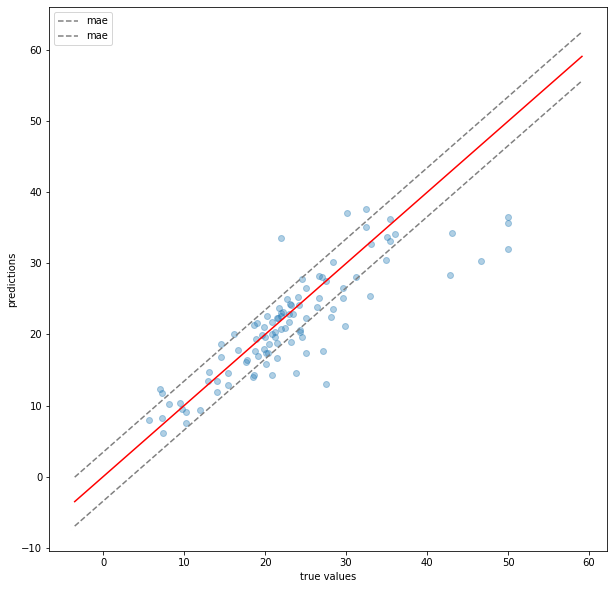

In [37]:
compare_preds(model_1, X_test, y_test)

In [22]:
rxs = model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 737us/step - loss: 3.4433 - mae: 3.4433


In [23]:
rxs

[3.443312168121338, 3.443312168121338]

In [38]:
# Build a model
tf.random.set_seed(42)

# 1. Create a model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(169, 
                          input_shape=(13,), 
                          activation=None),
    tf.keras.layers.Dense(13, 
                          input_shape=(169,), 
                          activation=None),
    tf.keras.layers.Dense(1, input_shape=(13,))
], name='model_2')

# 2. Compile the model

model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
               metrics=['mae'])

# 3. Fit the model

history_m2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 693us/step - loss: 140.1669 - mae: 140.1669
Epoch 2/100
13/13 [==============================] - 0s 844us/step - loss: 49.0923 - mae: 49.0923
Epoch 3/100
13/13 [==============================] - 0s 690us/step - loss: 15.5552 - mae: 15.5552
Epoch 4/100
13/13 [==============================] - 0s 614us/step - loss: 9.7471 - mae: 9.7471
Epoch 5/100
13/13 [==============================] - 0s 1000us/step - loss: 6.7179 - mae: 6.7179
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 6.2452 - mae: 6.2452
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 6.0261 - mae: 6.0261
Epoch 8/100
13/13 [==============================] - 0s 997us/step - loss: 8.0272 - mae: 8.0272
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 7.4860 - mae: 7.4860
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 6.8474 - mae: 6.8474
Epoch 11/100
13/13 [==================

4/4 [==============================] - 0s 756us/step - loss: 5.3048 - mae: 5.3048


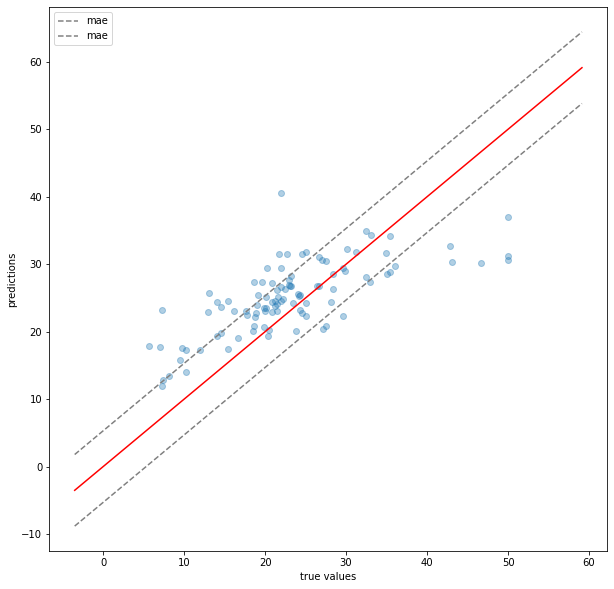

In [39]:
compare_preds(model_2, X_test, y_test)